# The Data

Here's the code to get the data.
It has already been split into training and test

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

# transform a feature into one hot encoding (similar to the 'get_dummies', but do not need concat)
def Trans_OHE(df, fea):  # 'fea' is the feature need to use one hot encoding
    tem = list(df[fea].unique())  # all the feature's values
    for i in tem:
        df[fea+'_'+str(i)] = 0
        df.loc[df[fea] == i, fea+'_'+str(i)] = 1
    del df[fea]
    print(fea,' OHE done.')
    

# test the age buckets by logisitic regreesion and CV
def Buckets(X,bucket,fea):  # 'X' and 'y' are dateframe, 'bucket' is a list of ages(int), like[0,15,25,35,65]
    temX = X.copy()  # then it will not change the original dataframe
    bucket.append(1000)  # add an upper limit of age
    for i in range(len(bucket)-1):  # generate buckets
        temX[fea+str(i)] = 0
        temX.loc[(temX[fea] >= bucket[i]) & (temX[fea] < bucket[i+1]), [fea+str(i)]] = 1
    del temX[fea]
    return temX
    

# out put two Kernel Density Functions(survived or not) to compare their distributions.
def kde_plot(data, feature, bandwidth): # data is dataframe, bandwidth is the length of each part of distribution
    sns.kdeplot(data.loc[data['Survived'] == 1][feature], bw = bandwidth, label = 'Survived')
    sns.kdeplot(data.loc[data['Survived'] == 0][feature], bw = bandwidth, label = 'Not Survived')
    plt.title(feature)
    plt.show()
    
# run different models
def Run_Model(model_name, X, y):  # model_name is string, the model's name
    if model_name == 'NB':  # judge which model should be used
        model = GaussianNB()   
    elif model_name == 'LR':  # considering there are many features, I use l1 Penalty
        model = LogisticRegression(penalty='l1',C=1) 
    elif  model_name == 'RF': 
        model = RandomForestClassifier(n_estimators=100)
    elif  model_name == 'SVC':
        model = LinearSVC()

    model.fit(X, y)  
    y_pred = model.predict(X)  # prediction

    accuracy = accuracy_score(y, y_pred)
    scores = cross_val_score(model, X, y, cv=5)  # cross volidation
    cross_val_avg = scores.mean()

    return accuracy, cross_val_avg

# to create a new feature by Pclass and sex
def Pclass_Sex(X_train_f):
    X_train_f['Pclass_Sex'] = 0
    # if pclass is 1 and is a male, then pclass_sex is 1M
    X_train_f.loc[(X_train_f.Pclass == 1)&(X_train_f.Sex == 'male'),['Pclass_Sex']] = '1M'
    X_train_f.loc[(X_train_f.Pclass == 2)&(X_train_f.Sex == 'male'),['Pclass_Sex']] = '2M'
    X_train_f.loc[(X_train_f.Pclass == 3)&(X_train_f.Sex == 'male'),['Pclass_Sex']] = '3M'
    X_train_f.loc[(X_train_f.Pclass == 1)&(X_train_f.Sex == 'female'),['Pclass_Sex']] = '1F'
    X_train_f.loc[(X_train_f.Pclass == 2)&(X_train_f.Sex == 'female'),['Pclass_Sex']] = '2F'
    X_train_f.loc[(X_train_f.Pclass == 3)&(X_train_f.Sex == 'female'),['Pclass_Sex']] = '3F'
    del X_train_f['Pclass'], X_train_f['Sex']
    return X_train_f


TITANIC_PATH = "./data"

train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
test_data  = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv")  )

train_data.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Directly try the basic model NB: Process data simply by deleting missing values, and only use the numerical data

train1 = train_data.copy()  # drop missing
X_train1 = train1.iloc[:,[1,2,5,6,7,9]].dropna()  # select only the numerical values
y_train1 = X_train1.iloc[:,0]
del X_train1['Survived']

accuracy, cross_val_avg = Run_Model('NB', X_train1, y_train1)  # run model, the function's definition is in the front of this progtam.
model = "Naive Bayes"
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Naive Bayes: Avg cross val score = 0.67
Naive Bayes: Accuracy = 67.23%


- Obviously, the result is upset, only get 71% accuracy, and it can be worse in the test set. Because we only used a few features, rather than all the information.

In [3]:
# 2nd method: Analyze data, deal with the missing values and do some categorical transformations.
# If we plot the pictures of every feature, we can find many interesting things, like children and woman were more likely to survive. Pcalss = 1 had more prabability to survive
train2 = train_data.copy()
X_train2 = train2.copy()  # we will delete the survived features later
y_train2 = train2.iloc[:,1].copy()  # get the survived data
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- We can see some missing value in Age, Cabin and Embarked, so we should process these missing values.
- Also, there are five object features, we should try to transform them into numerical features.

- The following picture shows the relationship between survived and other features. It shows Pclass and Fare are very important features.
- And we need to check whether other features are useless or not.

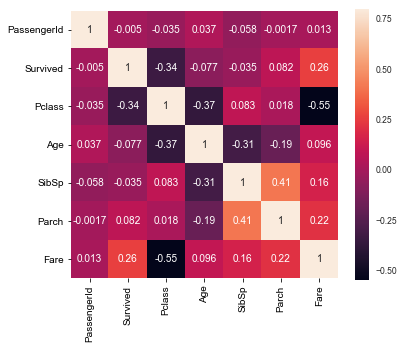

In [4]:
# Realationship
corrmat = X_train2.corr()  #correlation matrix
f, ax = plt.subplots(figsize=(6, 5))
sns.set(font_scale=0.85)
sns.heatmap(corrmat, annot = True, vmax=.8, square=True);

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


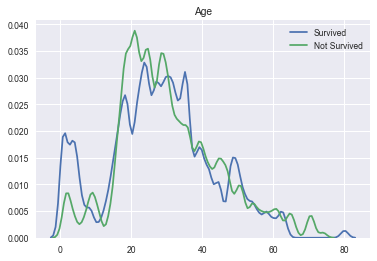

In [5]:
# using Kernel Density Function to find the relationship
kde_plot(X_train2, 'Age', 1)

- We can use Kernel Density Function to describe the distribution of a variable.
- In this picture, the blue line means distribution of a person's age when he was survived, and the green line is when he was not.
- When there is a big gap between two line, means in this part, 'Age' shows different distribution in this part. **So 'Age' can be a meaningful varibale**, espeicially in the following age phase:'0-12','18-30'.

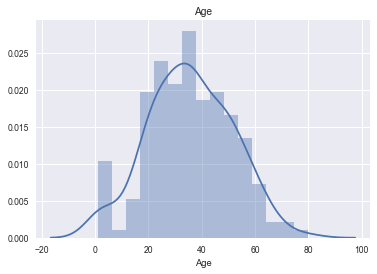

In [6]:
# plot the distribution of Age (without missing values)
sns.distplot(X_train2.dropna().Age, kde=True, bins=15)
plt.title('Age')
plt.show()

## Missing values:
- According to the above picture, 'Age' looks like Normal Distribution. There are about 20% missing in age, and here we can simply **use the midean to replace the missing**. It seems not good, and **I will improve this method in later part**. (I also tried to use the ramdom normal distribution to simulate the distribution of 'Age' and repalce the missing, but the result is not good). Then convert the 'Age' into 'int', that makes more sense.
- Considering the missing value of 'Embarked', there are only 2 missing values. **So we can use the most frequent value to replace missing in 'Embarked'**.
- But the missing in 'Cabin' is too much(more than 70%), I don't have good idea to deal with it, so I **delete the 'Cabin'**.

In [7]:
# replace the missing values
X_train2['Age'] = X_train2['Age'].fillna(X_train2['Age'].median())  # use median to replace age
X_train2['Embarked']=X_train2['Embarked'].fillna(X_train2['Embarked'].mode()[0])  # use mode of Embarked to replace missing

del X_train2['Cabin']

- Then we need to do categorical transformations. So basically, we can use one hot encoding to deal with the categorical features. And also, delete one of them to prevent dammy variable trip.
- Also, we delete Name, Ticket here, I will process them later.

In [8]:
# categorical transformations by one hot encoding
Trans_OHE(X_train2,'Sex')  # function is defined in the begining part
Trans_OHE(X_train2,'Pclass')
Trans_OHE(X_train2,'Embarked')
del X_train2['Sex_male'], X_train2['Embarked_Q'], X_train2['Pclass_3'],  X_train2['Name'], X_train2['Ticket'], X_train2['Survived'], X_train2['PassengerId']

X_train2.head()

Sex  OHE done.
Pclass  OHE done.
Embarked  OHE done.


,Age,SibSp,Parch,Fare,Sex_female,Pclass_1,Pclass_2,Embarked_S,Embarked_C
0,22.0,1,0,7.2500,0,0,0,1,0
1,38.0,1,0,71.2833,1,1,0,0,1
2,26.0,0,0,7.9250,1,0,0,1,0
3,35.0,1,0,53.1000,1,1,0,1,0
4,35.0,0,0,8.0500,0,0,0,1,0


In [9]:
accuracy, cross_val_avg = Run_Model('NB', X_train2, y_train2)
model = "Naive Bayes"
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Naive Bayes: Avg cross val score = 0.78
Naive Bayes: Accuracy = 78.79%


In [10]:
accuracy, cross_val_avg = Run_Model('LR', X_train2, y_train2)
model = "Logistic Regression, version 0"
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Logistic Regression, version 0: Avg cross val score = 0.79
Logistic Regression, version 0: Accuracy = 80.47%


### Basic Feature Engineering

- We have discussed that 'Age' has low relationship with 'Survived'. But in Kernel Density Function, as we can see, 'Age' is an important feature. So if we divided the feature into several parts, the relationship might be enhanced.  
- The first way to set the barket is according to the percentile, we can separate the data equally by the number of sample, like using 20%, 40%, 60% and 80%.
- The second way is that according to Kernel Density Function of Age. We can find in some part, 'Age' is an effective feature. Hence, we should divided the data in some sections and ensure each section include some 'important part'. So Accodring the picture following, we will use.
- The third way is just divide age into 3 parts Child(0-15), Adult(15-45), Older(45+). In that case it is very direct feature.

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


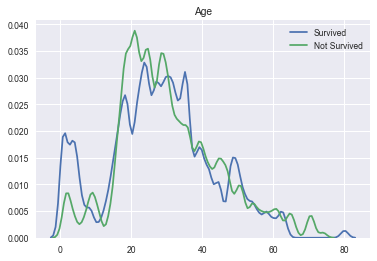

In [11]:
# Kernel Density Function of Age (for Survived and not Survived)
kde_plot(train_data, 'Age', 1)

In [12]:
# percentile of Age
for i in [0.2,0.4,0.6,0.8,1.0]:
    print(X_train2.Age.quantile(i), end="   ")

20.0   28.0   28.0   38.0   80.0   

In [13]:
# use 3 methods to separate data, and run the model respectively
# (I should delete one of the buckets to adviod dummies trap, but if I do so, the result if worse, and will change when I delete differnt bucket)
X_test1 = Buckets(X_train2 , [0, 18, 25, 32, 42],'Age')
# del X_test1['Age4']
X_test2 = Buckets(X_train2 , [0, 16, 26, 38, 48],'Age')
# del X_test2['Age4']
X_test3 = Buckets(X_train2 , [0, 15, 45],'Age')
# del X_test3['Age2']

# test1
accuracy, cross_val_avg = Run_Model('LR', X_test1, y_train2)
model = "Logistic Regression, bucketing version 1"
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

# test2
accuracy, cross_val_avg = Run_Model('LR', X_test2, y_train2)
model = "Logistic Regression, bucketing version 2"
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

# test3
accuracy, cross_val_avg = Run_Model('LR', X_test3, y_train2)
model = "Logistic Regression, bucketing version 2"
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=model, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=model, a=accuracy) )

Logistic Regression, bucketing version 1: Avg cross val score = 0.79
Logistic Regression, bucketing version 1: Accuracy = 80.58%
Logistic Regression, bucketing version 2: Avg cross val score = 0.80
Logistic Regression, bucketing version 2: Accuracy = 81.37%
Logistic Regression, bucketing version 2: Avg cross val score = 0.80
Logistic Regression, bucketing version 2: Accuracy = 80.58%


## Inside Data: more feature engineering

In [14]:
# First, copy the data
train_f = train_data.copy()
X_train_f = train_f.copy()  # we will delete the survived features later
y_train_f = train_f.iloc[:,1].copy()

#### 1. Create a feature 'Title' according to 'Name'
- we can see in name there also a title, like 'Mr',' Miss".
- It can be a meaningful information, beacuse whether married can be a good feature. Also, we can use one hot encoding to process this data easily. As the form shows below, the most frequence title is Mr, Miss, Mrs and Master.
- I notice something interesting: there are people with 'Rev' title are all man and they all dead. 'Rev' may be reverend, the man serverd the god. So they probably sacrificed themselves. And 'Rev' can be a meaningful title, other titles I use 'Other' to represent.
- Also, I find their are 400+ last name in 800+ samples. The people with the same last name probably from the same family, so the one with unique last name may get in ship alone, and it can be a feature.

In [15]:
# split title
X_train_f['Title'] = X_train_f.Name.map(lambda x: x.split(',')[1].split('.')[0][1:])
# split last name
X_train_f['L_Name'] = X_train_f.Name.map(lambda x: x.split(',')[1].split('.')[1][1:].split(' ')[0])
X_train_f['L_Name'].describe()
X_train_f['L_Name'] = X_train_f.groupby('L_Name')['L_Name'].transform('count')
X_train_f['Alone'] = 0
# when last name is unique, he is alone
X_train_f.loc[X_train_f['L_Name'] ==1, ['Alone']] = 1
del X_train_f['L_Name']
# look inside of the Rev title
print(X_train_f['Title'].value_counts(),'\n')
print(X_train_f[X_train_f['Title']=='Rev'])
# leave the major 5 titles
X_train_f['Title'] = X_train_f.Title.map(lambda x: x if x in ['Mr','Mrs','Miss','Master','Rev'] else 'Other')

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Don               1
the Countess      1
Capt              1
Mme               1
Ms                1
Jonkheer          1
Sir               1
Name: Title, dtype: int64 

     PassengerId  Survived  Pclass                               Name   Sex  \
149          150         0       2  Byles, Rev. Thomas Roussel Davids  male   
150          151         0       2         Bateman, Rev. Robert James  male   
249          250         0       2      Carter, Rev. Ernest Courtenay  male   
626          627         0       2     Kirkland, Rev. Charles Leonard  male   
848          849         0       2                  Harper, Rev. John  male   
886          887         0       2              Montvila, Rev. Juozas  male   

      Age  SibSp  Parch       Ticket    Fare Cabin Embarked Title  Alone  
149

#### 2. From 'Ticket' generate two features: T_Count, Unit_Fare
- We can see that there are only 681 unique ticket in 891 samples, so many people used the same ticket to get in to the ship, and that can be a useful feature.
- Also it caused the prices of these tickets are much higher than the normal prices. We can use the fare devided by the number of people hold a same ticket, 'Unit_Fare'.
- And I noticed that there are 15 sample's fare is 0, and they are from 1,2 and 3 Pclass. That's strange, and it seems not to be the free tickets, because the 3 class should not have free tickets. So I believe they are missing values, and use the medain 'Unit_Fare' of each class to replace.
- The range of Unit_Fare is to large, which is not good for logisitic regression, So we can take a log to deal with it.
- T_Count large 2 means they are good friends or a family, so we treat T_Count as a categorical feature. Because they one went out with friends, they might help each other.

In [16]:
print(X_train_f.Ticket.describe(),'\n')
print('there are ', X_train_f.Fare.loc[X_train_f.Fare == 0].count(),' zero in \'Fare\'')
# generate a feature T_Count, to represent how many person hold this ticket.
X_train_f['T_Count'] = X_train_f.groupby('Ticket')['Ticket'].transform('count')
# fare divided by T_Count can be the true fare of the person
X_train_f['Unit_Fare'] = X_train_f.Fare / X_train_f.T_Count
Unit_Fare_list = [0 for i in range(3)]
for i in range(1,4):
    Unit_Fare_list[i-1] = X_train_f.loc[X_train_f.Pclass == i, ['Unit_Fare']].median()[0]
    X_train_f.loc[(X_train_f.Pclass == i) & (X_train_f.Unit_Fare == 0), ['Unit_Fare']] = Unit_Fare_list[i-1]
# take a log
X_train_f['UF_log'] = np.log(X_train_f.Unit_Fare)
# devide T_Count into 2 parts: 1 and 2+
X_train_f = Buckets(X_train_f,[1, 2],'T_Count')
del X_train_f['Fare'], X_train_f['Unit_Fare']

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object 

there are  15  zero in 'Fare'


#### 3. Create 'Family' features according to 'Sibsp' and 'Parch'
- We can use Kernel Density Function to describe the distribution of a variable. And we find SibSp and Parch are not significant features.
- Then, we consider if creat a varible family (= siblings + parents + children). Because the meaning of Sibsp and Parch are similar, and we can just combine them together. The kde photo shows the combination is better.
- Also, it is better to treat the family as a categorical feature rather than a numerical feature. Because it is hard to say the person with 4 family has something 4 times stronger than a person with 1 'Family'. It is reasonable to think a person with soem 'Family' has some speacial features than a person with no 'Family', like family member would definitely help each other. So I will use bucket to treat the 'Family' have family or not.

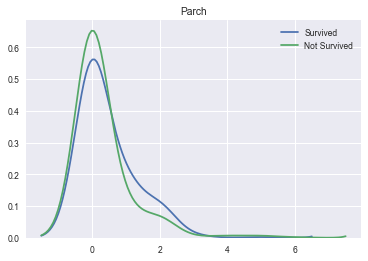

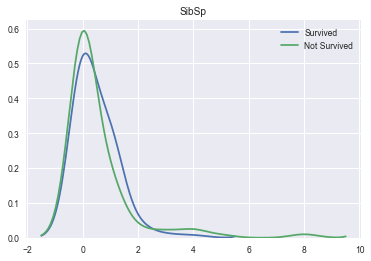

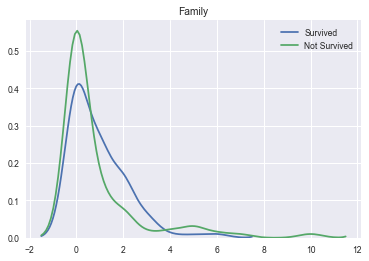

In [17]:
# generate a feature 'Family'
X_train_f['Family'] = X_train_f['SibSp'] + X_train_f['Parch']
# Test whether the distribution of family is more useful
kde_plot(X_train_f, 'Parch', 0.5)
kde_plot(X_train_f, 'SibSp', 0.5)
X_train_f['Family'] = X_train_f['SibSp'] + X_train_f['Parch'] # family member = siblings + parents + children
kde_plot(X_train_f, 'Family', 0.5)
# separate Family into some parts: 0,1+
X_train_f = Buckets(X_train_f,[0, 1],'Family')
del X_train_f['SibSp'], X_train_f['Parch']

#### 4. Pclass_Sex: combine Pclass and Sex
- In the lecture, the professor mentioned that in Class 1 and 2, female have large probability to live, but in class 3, female and male's survived rate is equal.
- So we can combine Pclass and Sex, to generate a Pclass_Sex. '1M' means a male in class 1. '2F' means a female in class 2. Then use One Hot Encoding.

In [18]:
# generate Pclass_Sex
# definitaion is in the begining part of this program.
X_train_f = Pclass_Sex(X_train_f)

#### 5. New way to replace the missing in Age
- The title give us some information about Age. For example, Mrs will be older than Miss.
- So we can use the median of each Title to replace the missing of Age. (an interesting thing is that Masters are very young)

In [19]:
# replace the missing values
Age_list = [0 for i in range(5)]
Title_list = ['Mr','Mrs','Miss','Master','Rev']
for i in range(5):
    Age_list[i] = X_train_f.loc[X_train_f.Title == Title_list[i], ['Age']].median()[0]
    X_train_f.loc[(X_train_f.Title == Title_list[i])].Age.fillna(Age_list[i])
# X_train_f = Buckets(X_train_f, [0, 15, 45],'Age')
# bucket the age
X_train_f = Buckets(X_train_f , [0, 16, 26, 38, 48],'Age')
X_train_f['Embarked'] = X_train_f['Embarked'].fillna(X_train_f['Embarked'].mode()[0])  

Pclass_Sex  OHE done.
Embarked  OHE done.
Title  OHE done.


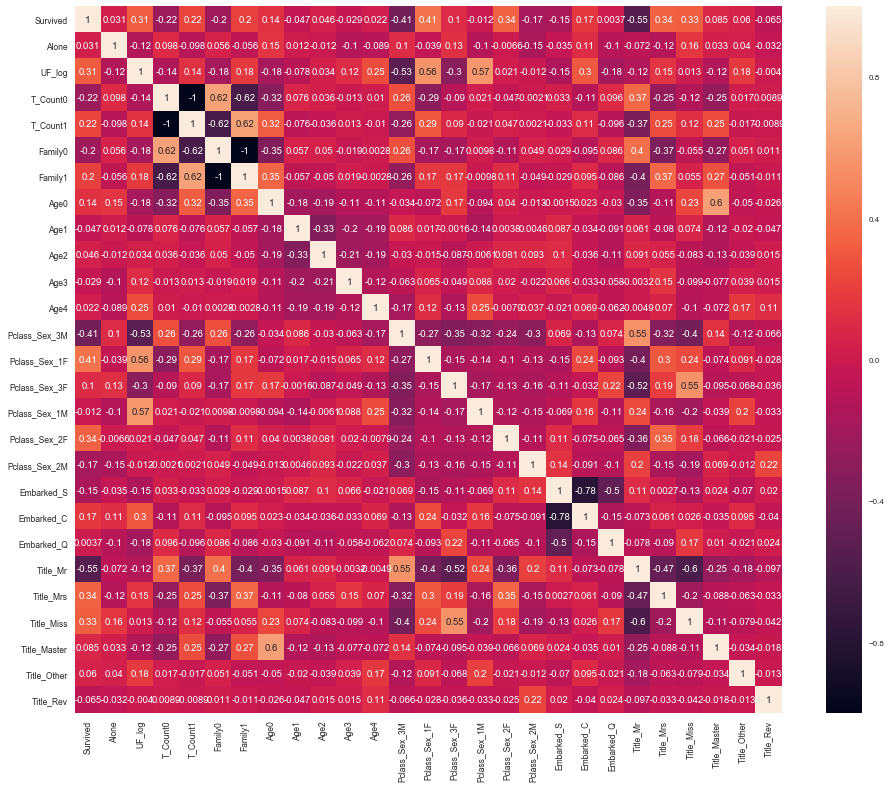

In [20]:
# One Hot Encoding
Trans_OHE(X_train_f,'Pclass_Sex')
Trans_OHE(X_train_f,'Embarked')
Trans_OHE(X_train_f,'Title')
# delete some features that may cause the dummy variables trap and some object features.
del X_train_f['Cabin'], X_train_f['PassengerId'], X_train_f['Name'], X_train_f['Ticket']

# Realationship matrix
corrmat = X_train_f.corr()  #correlation matrix
f, ax = plt.subplots(figsize=(16, 13))
sns.set(font_scale=0.8)
sns.heatmap(corrmat, annot = True, vmax=1, square=True)
plt.show()

In [21]:
# according to the matrix, we delete the feature with lower than 2% correlation with Survived and some feautre may cause dummies trap
del X_train_f['Survived'], X_train_f['Embarked_Q'],X_train_f['Age3'], X_train_f['Age4'], X_train_f['T_Count0'], X_train_f['Family0'] 
accuracy, cross_val_avg = Run_Model('LR', X_train_f, y_train_f)
title = "Logistic Regression, bucketing version 3 "
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=title, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=title, a=accuracy) )

Logistic Regression, bucketing version 3 : Avg cross val score = 0.80
Logistic Regression, bucketing version 3 : Accuracy = 82.60%


- It shows the result improves a lot. The feature engineering works!
- But it might be overfitting, since some informtion is too specific.
- Cabin is hard to use. I don't know how to do.

## Optimise

- I notice there is a sample in test missing value in Fare, so I just use median to replace.
- First, process train and test in the same way.

In [22]:
# train
train_f = train_data.copy()
X_train_f = train_f.copy()  # we will delete the survived features later
y_train_f = train_f.iloc[:,1].copy()

# test
test_f = test_data.copy()
print(test_f.info())
test_f['Fare'] = test_f['Fare'].fillna(train_data['Fare'].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [23]:
# Title, T_count, Family, Unit_Fare
X_train_f['Title'] = X_train_f.Name.map(lambda x: x.split(',')[1].split('.')[0][1:])
X_train_f['Title'] = X_train_f.Title.map(lambda x: x if x in ['Mr','Mrs','Master','Miss','Rev'] else 'Other')
X_train_f['T_Count'] = X_train_f.groupby('Ticket')['Ticket'].transform('count')
X_train_f['Unit_Fare'] = X_train_f.Fare / X_train_f.T_Count
for i in range(1,4):
    X_train_f.loc[(X_train_f.Pclass == i) & (X_train_f.Unit_Fare == 0), ['Unit_Fare']] = Unit_Fare_list[i-1]
X_train_f['UF_log'] = np.log(X_train_f.Unit_Fare)
X_train_f['Family'] = X_train_f['SibSp'] + test_f['Parch']


test_f['Title'] = test_f.Name.map(lambda x: x.split(',')[1].split('.')[0][1:])
test_f['Title'] = test_f.Title.map(lambda x: x if x in ['Mr','Mrs','Master','Miss','Rev'] else 'Other')
test_f['T_Count'] = test_f.groupby('Ticket')['Ticket'].transform('count')
test_f['Unit_Fare'] = test_f.Fare / test_f.T_Count
for i in range(1,4):
    test_f.loc[(test_f.Pclass == i) & (test_f.Unit_Fare == 0), ['Unit_Fare']] = Unit_Fare_list[i-1]
test_f['UF_log'] = np.log(test_f.Unit_Fare)
test_f['Family'] = test_f['SibSp'] + test_f['Parch']

In [24]:
# missing
for i in range(5):
    X_train_f.loc[(X_train_f.Title == Title_list[i])].Age.fillna(Age_list[i])
X_train_f['Embarked'] = X_train_f['Embarked'].fillna(train_data['Embarked'].mode()[0])  # use mode of Embarked to replace missing
X_train_f['Fare'] = X_train_f['Fare'].fillna(train_data['Fare'].median())


for i in range(5):
    test_f.loc[(test_f.Title == Title_list[i])].Age.fillna(Age_list[i])
test_f['Embarked'] = test_f['Embarked'].fillna(train_data['Embarked'].mode()[0])  # use mode of Embarked to replace missing
test_f['Fare'] = test_f['Fare'].fillna(train_data['Fare'].median())

In [25]:
# One Hot Encoding
X_train_f = Pclass_Sex(X_train_f)
Trans_OHE(X_train_f,'Pclass_Sex')
Trans_OHE(X_train_f,'Embarked')
Trans_OHE(X_train_f,'Title')
X_train_f = Buckets(X_train_f , [0, 16, 26, 38, 48],'Age')
#X_train_f = Buckets(X_train_f, [0, 15, 45],'Age')
X_train_f = Buckets(X_train_f,[0, 1],'Family')
X_train_f = Buckets(X_train_f,[1, 2],'T_Count')

del X_train_f['Survived'], X_train_f['Cabin'], X_train_f['PassengerId'], X_train_f['Name'], X_train_f['Ticket']\
        #,X_train_f['SibSp'], X_train_f['Parch'], X_train_f['Fare'], X_train_f['Unit_Fare'], X_train_f['Embarked_Q']
    
    
test_f = Pclass_Sex(test_f)
Trans_OHE(test_f,'Pclass_Sex')
Trans_OHE(test_f,'Embarked')
Trans_OHE(test_f,'Title')
test_f= Buckets(test_f, [0, 16, 26, 38, 48],'Age')
test_f = Buckets(test_f,[0, 1],'Family')
test_f = Buckets(test_f,[1, 2],'T_Count')

del test_f['Cabin'], test_f['PassengerId'], test_f['Name'], test_f['Ticket']\
        #,test_f['SibSp'], test_f['Parch'], test_f['Fare'], test_f['Unit_Fare'], test_f['Embarked_Q']
        
test_f.info()

Pclass_Sex  OHE done.
Embarked  OHE done.
Title  OHE done.
Pclass_Sex  OHE done.
Embarked  OHE done.
Title  OHE done.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
Unit_Fare        418 non-null float64
UF_log           418 non-null float64
Pclass_Sex_3M    418 non-null int64
Pclass_Sex_3F    418 non-null int64
Pclass_Sex_2M    418 non-null int64
Pclass_Sex_1M    418 non-null int64
Pclass_Sex_1F    418 non-null int64
Pclass_Sex_2F    418 non-null int64
Embarked_Q       418 non-null int64
Embarked_S       418 non-null int64
Embarked_C       418 non-null int64
Title_Mr         418 non-null int64
Title_Mrs        418 non-null int64
Title_Miss       418 non-null int64
Title_Master     418 non-null int64
Title_Other      418 non-null int64
Title_Rev        418 non-null int64
Age0             418 non-null int64
Age1           

In [26]:
title = "Logistic Regression"
accuracy, cross_val_avg = Run_Model('LR', X_train_f, y_train_f)
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=title, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=title, a=accuracy) )

Logistic Regression: Avg cross val score = 0.83
Logistic Regression: Accuracy = 83.84%


In [27]:
title = "Random Forest"
accuracy, cross_val_avg = Run_Model('RF', X_train_f, y_train_f)
print("{m:s}: Avg cross val score = {sc:3.2f}".format(m=title, sc=cross_val_avg) )
print("{m:s}: Accuracy = {a:.2%}".format(m=title, a=accuracy) )

Random Forest: Avg cross val score = 0.80
Random Forest: Accuracy = 97.08%
